<a href="https://colab.research.google.com/github/vamsijan/audio_ravdess/blob/main/BERT_MODEL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 5.0 MB/s 
     |████████████████████████████████| 7.6 MB 44.9 MB/s 
     |████████████████████████████████| 182 kB 24.7 MB/s 


In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from transformers import BertModel, TFBertModel 
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from transformers import AutoTokenizer

DATA SET

In [ ]:
fake_data=pd.read_csv("Fake.csv.zip")
real_data=pd.read_csv("True.csv.zip")

DATA ANALYSIS

In [ ]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


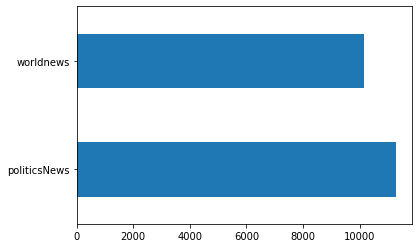

In [ ]:
real_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5

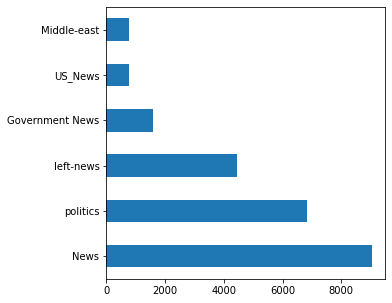

In [ ]:
fake_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5

wordcloud real text data

In [ ]:
wordcld_mask=np.array(Image.open("logo.png"))

In [ ]:
wordcld_text=" ".join(real_data["text"].tolist())

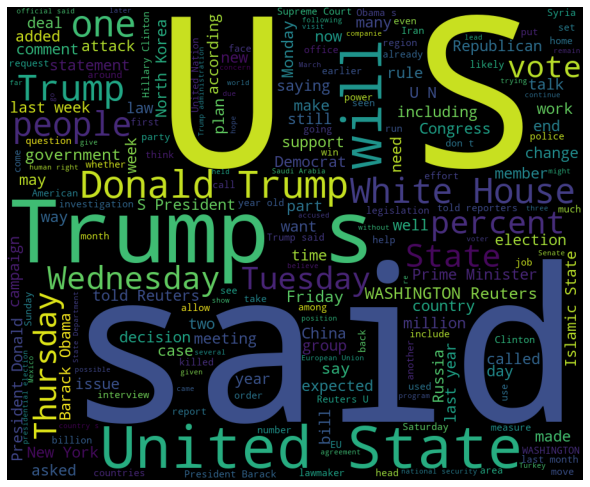

In [ ]:
wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(wordcld_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

wordcloud fake text data

In [ ]:
fake_text=" ".join(fake_data["text"].tolist())

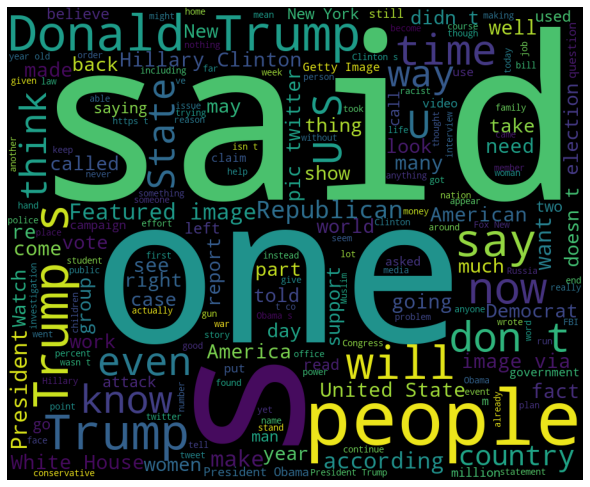

In [ ]:
wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(fake_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
fake_data["label"]="fake"
real_data["label"]="real"

In [ ]:
final_data= pd.concat([fake_data,real_data])

In [ ]:
final_data = final_data.sample(frac=1).reset_index(drop=True)

In [ ]:
final_data.head(10)

,title,text,subject,date,label
0,THE HUNT IS ON: How Trump Team Is Smoking Out ...,President Trump has made it clear that he will...,Government News,"Feb 18, 2017",fake
1,BREAKING: MORE HACKED E-MAILS From DNC Release...,It s not the first time that the name of Vladi...,politics,"Sep 13, 2016",fake
2,"Brazil judge suspends aspects of J&F leniency,...",BRASILIA (Reuters) - A Brazilian judge on Mond...,worldnews,"September 11, 2017",real
3,HOLLYWOOD HYPOCRITES: These Lefty Celebs Play ...,J-Lo was sorry. She didn t mean to sing Happy...,politics,"Jan 2, 2017",fake
4,"With eye on Obamacare, Price takes helm as U.S...",WASHINGTON (Reuters) - Tom Price was sworn in ...,politicsNews,"February 10, 2017",real
5,FUNNY! SNL’S SOLUTION To Democrat Election Den...,,politics,"Nov 20, 2016",fake
6,"U.N. seeks report from Myanmar on rapes, death...",GENEVA (Reuters) - A United Nations women s ri...,worldnews,"November 28, 2017",real
7,Lawmakers urge U.S. to craft targeted sanction...,WASHINGTON (Reuters) - More than 40 lawmakers ...,worldnews,"October 18, 2017",real
8,BLACK MEN FOR BERNIE FOUNDER Campaigns In Swin...,"Apparently, using thug Michael Ferguson s mom ...",politics,"Aug 27, 2016",fake
9,Iraqi PM's office says Turkey agrees to deal o...,BAGHDAD (Reuters) - Turkey told Iraq it would ...,worldnews,"September 28, 2017",real


In [ ]:
final_data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [ ]:
final_data.drop(["subject","date"], axis=1)

,title,text,label
0,THE HUNT IS ON: How Trump Team Is Smoking Out ...,President Trump has made it clear that he will...,fake
1,BREAKING: MORE HACKED E-MAILS From DNC Release...,It s not the first time that the name of Vladi...,fake
2,"Brazil judge suspends aspects of J&F leniency,...",BRASILIA (Reuters) - A Brazilian judge on Mond...,real
3,HOLLYWOOD HYPOCRITES: These Lefty Celebs Play ...,J-Lo was sorry. She didn t mean to sing Happy...,fake
4,"With eye on Obamacare, Price takes helm as U.S...",WASHINGTON (Reuters) - Tom Price was sworn in ...,real
...,...,...,...
44893,IRAQ 1991: US Carpet Bombs ‘Highway of Death’,ROAR MagI want to give testimony on what are c...,fake
44894,These ‘Christian’ Parents Literally Want To P...,Some people just don t understand freedom of ...,fake
44895,We Can’t Afford To Feed The Poor But We’re Sp...,The military s budget is being massively expan...,fake
44896,Czech police ask parliament to allow prosecuti...,PRAGUE (Reuters) - Czech police have requested...,real


In [ ]:
final_data.head()

,title,text,subject,date,label
0,THE HUNT IS ON: How Trump Team Is Smoking Out ...,President Trump has made it clear that he will...,Government News,"Feb 18, 2017",fake
1,BREAKING: MORE HACKED E-MAILS From DNC Release...,It s not the first time that the name of Vladi...,politics,"Sep 13, 2016",fake
2,"Brazil judge suspends aspects of J&F leniency,...",BRASILIA (Reuters) - A Brazilian judge on Mond...,worldnews,"September 11, 2017",real
3,HOLLYWOOD HYPOCRITES: These Lefty Celebs Play ...,J-Lo was sorry. She didn t mean to sing Happy...,politics,"Jan 2, 2017",fake
4,"With eye on Obamacare, Price takes helm as U.S...",WASHINGTON (Reuters) - Tom Price was sworn in ...,politicsNews,"February 10, 2017",real


In [ ]:
final_data.label.value_counts()

fake    23481
real    21417
Name: label, dtype: int64

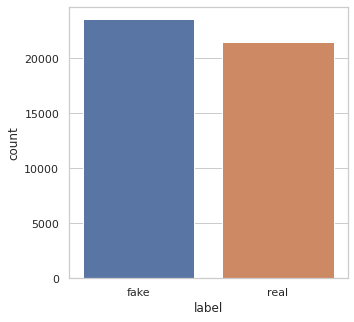

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(x=final_data["label"])

In [ ]:
final_data.head(5)

,title,text,subject,date,label
0,THE HUNT IS ON: How Trump Team Is Smoking Out ...,President Trump has made it clear that he will...,Government News,"Feb 18, 2017",fake
1,BREAKING: MORE HACKED E-MAILS From DNC Release...,It s not the first time that the name of Vladi...,politics,"Sep 13, 2016",fake
2,"Brazil judge suspends aspects of J&F leniency,...",BRASILIA (Reuters) - A Brazilian judge on Mond...,worldnews,"September 11, 2017",real
3,HOLLYWOOD HYPOCRITES: These Lefty Celebs Play ...,J-Lo was sorry. She didn t mean to sing Happy...,politics,"Jan 2, 2017",fake
4,"With eye on Obamacare, Price takes helm as U.S...",WASHINGTON (Reuters) - Tom Price was sworn in ...,politicsNews,"February 10, 2017",real


In [ ]:
final_data["text"]=final_data["title"]+final_data["text"]

In [ ]:
final_data=final_data[["text","label"]]

In [ ]:
final_data['label'] = final_data['label'].map({'real':1, 'fake':0})

In [ ]:
final_data.sample(5)

,text,label
19673,WATCH HILLARY CLINTON Go Full On Socialist…You...,0
25285,U.S. lawmakers want moratorium on commercial f...,1
26638,Tillerson says no decision yet on Trump-Putin ...,1
34605,"Justice Department, ex-Obama lawyers duel over...",1
40302,BUILD THE WALL! House Voted on Funding Trump’s...,0


In [ ]:
final_data.label[9943]

1

In [ ]:
final_data.text[36709]

'Biden sees growing progress in battle against Islamic StateBALTIMORE (Reuters) - The U.S.-led battle against Islamic State militants controlling parts of Iraq and Syria is gaining steam and will show more progress by year’s end, Vice President Joe Biden said on Thursday. Biden touted the recent success of U.S. efforts backing Iraqi troops against the Islamic State in Iraq as part of a broad defense of Obama administration foreign policy. “I promise you, after Ramadi, watch what happens now in Raqqa in Syria and what happens in Mosul (Iraq), by end of this year,” he told U.S. House of Representatives Democrats, in Baltimore for a three-day retreat. Iraqi forces, boosted by U.S. training, have evicted insurgents from large parts of Ramadi, leading to speculation that they could have success elsewhere against the Islamic State. “We’ve taken back collectively 40 percent of the territory  they occupy,” Biden said. White House spokesman Josh Earnest, asked about Biden’s remarks, said he had

In [ ]:
max_len=100
data_text=final_data["text"]
data_label=final_data["label"]

In [ ]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data_text, data_label, stratify = data_label, test_size = 0.2, random_state =42)

In [ ]:
def tokenize(X):
    
    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

In [ ]:
X_train_token = tokenize(X_train)
X_test_token = tokenize(X_test)

In [ ]:
maxlen=100

BERT MODEL

In [ ]:
def create_model():
    dropout_rate=0.2
    input_ids=Input(shape=(maxlen,),dtype=tf.int32)
    input_mask=Input(shape=(maxlen,),dtype=tf.int32)
    bert_layer=bert_model([input_ids,input_mask])[1]
    x=Dropout(0.5)(bert_layer)
    x=Dense(64,activation="tanh")(x)
    x=Dropout(0.2)(x)
    x=Dense(1,activation="sigmoid")(x)
    model = Model(inputs=[input_ids, input_mask], outputs=x)
    return model
    

In [ ]:
model=create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 100,                                           

In [ ]:
optimizer = Adam(learning_rate=1e-05, epsilon=1e-08, decay=0.01,clipnorm=1.0)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=50,baseline=0.4,min_delta=0.0001,restore_best_weights=False)

In [ ]:
history = model.fit(x = {'input_1':X_train_token['input_ids'],'input_2':X_train_token['attention_mask']}, y = Y_train, epochs=10, validation_split = 0.2, batch_size = 30, callbacks=[callback])

Epoch 1/10
958/958 [==============================] - 705s 713ms/step - loss: 0.0483 - accuracy: 0.9833 - val_loss: 0.0098 - val_accuracy: 0.9978
Epoch 2/10
958/958 [==============================] - 679s 708ms/step - loss: 0.0059 - accuracy: 0.9991 - val_loss: 0.0072 - val_accuracy: 0.9983
Epoch 3/10
958/958 [==============================] - 678s 708ms/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0065 - val_accuracy: 0.9983
Epoch 4/10
958/958 [==============================] - 677s 707ms/step - loss: 0.0037 - accuracy: 0.9995 - val_loss: 0.0061 - val_accuracy: 0.9985
Epoch 5/10
958/958 [==============================] - 678s 708ms/step - loss: 0.0032 - accuracy: 0.9996 - val_loss: 0.0059 - val_accuracy: 0.9986
Epoch 6/10
958/958 [==============================] - 679s 708ms/step - loss: 0.0032 - accuracy: 0.9996 - val_loss: 0.0061 - val_accuracy: 0.9986
Epoch 7/10
958/958 [==============================] - 679s 709ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.0056 -

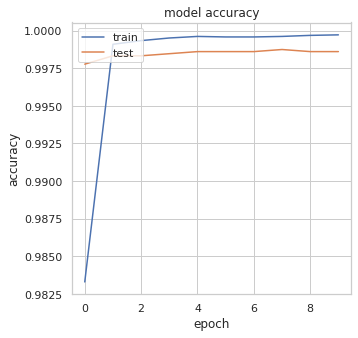

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

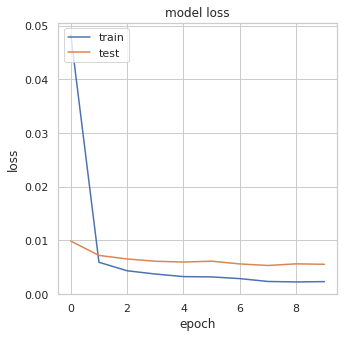

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
y_pred = np.where(model.predict({ 'input_1' : X_test_token['input_ids'] , 'input_2' : X_test_token['attention_mask']}) >=0.5,1,0)

281/281 [==============================] - 67s 227ms/step


Confusion matrix

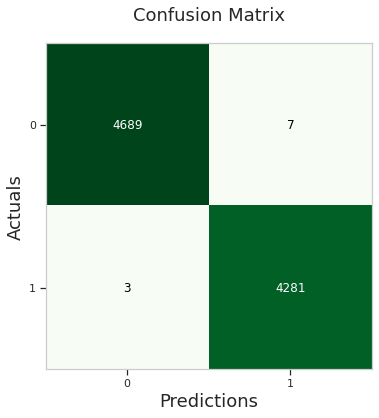

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
conf_matrix = confusion_matrix(Y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



Custom data prediction

In [ ]:
test_text="Cop Shares Racist Meme About Michelle Obama; Now That Cop Is Having A VERY Bad Day (IMAGES)After the election of Donald Trump many folks seem to see it as a permission slip to be as racist and vile as possible. However, here s the thing, you re still going to get called out as racist and vile. And one Alabama police officer just found this out the hard way.According to the Washington Post: Talladega Police Officer Joel Husk was terminated Wednesday for violating the department s social media and code of conduct policies, City Manager Patrick Bryant said. What did he do? So glad you asked: Husk had posted several memes on his Facebook page, including one showing Obama and Melania Trump.  Fluent in Slovenian, English, French, Serbian, and German,  it said over Trump s photo. Over Obama s, it read:  Fluent in Ghetto. Not only that, he posted several extraordinarily racist memes:via Washington Postvia Washington PostAccording to the City Manager, the statements were  deemed to be biased or racially insensitive or derogatory  and because of that, they  have to take action to correct it. If you re going to be a police officer and serve all the public, you can t assume black people standing up for their rights are equivalent to the KKK. That s about the most horrific equivalence imaginable.Also, according to WaPo: Husk, 37, who had been with the department for about two and a half years, had also shared a meme showing President Obama with the words:  Was Dallas a terrorist attack? Yes! Carried out by Obama s own homegrown terrorist group! Which is a blatant lie and anyone who were to feel that way belongs nowhere near law enforcement. The city took the proper action letting this racist cop go, and hopefully it will be an example to police departments all over the country that this sort of behavior simply cannot be tolerated.Trump s election must not be allowed to serve as a permission slip to bigots everywhere that it s fine to be as awful as possible, because here in the land of the free and the home of the brave, everyone is protected. Everyone, regardless of color, class, gender, sexual orientation, or creed.Featured Photo by Chip Somodevilla/Getty Images'"

In [ ]:
test_token = tokenize(test_text)

In [ ]:
test_text_pred = np.where(model.predict({ 'input_1' : test_token['input_ids'] , 'input_2' : test_token['attention_mask']}) >=0.5,1,0)

69/69 [==============================] - 15s 219ms/step


In [ ]:
test_text_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
if(test_text_pred[0]==0):
    print("News is Fake")
else:
    print("News is Real")

News is Fake
